## Simple Linear Classification Model: Input Layer and Activation (Output) Layer

1. Load Breast Cancer Data
2. Learn the data
3. Split into train and test
4. Normalize Data
5. Build the model
6. Train the model
7. Plot loss and accuracy

In [41]:
import tensorflow as tf 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [42]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [43]:
data = load_breast_cancer()

In [44]:
type(data)

sklearn.utils._bunch.Bunch

In [45]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [46]:
data.data.shape 
# samples, features

(569, 30)

In [47]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [48]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [49]:
# Split data sets
X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [50]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((381, 30), (188, 30), (381,), (188,))

In [51]:
# Normalize data
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [52]:
# Create and train model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

r = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100)

Epoch 1/100
11/12 [==========================>...] - ETA: 0s - loss: 0.7491 - accuracy: 0.5426

2022-09-05 19:37:07.481883: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-05 19:37:07.679385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 0s 18ms/step - loss: 0.7501 - accuracy: 0.5407 - val_loss: 0.6802 - val_accuracy: 0.5798
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 0.6775 - accuracy: 0.6142 - val_loss: 0.6187 - val_accuracy: 0.6755
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6122 - accuracy: 0.6798 - val_loss: 0.5673 - val_accuracy: 0.7447
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 0.5579 - accuracy: 0.7402 - val_loss: 0.5232 - val_accuracy: 0.7926
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.5112 - accuracy: 0.7743 - val_loss: 0.4858 - val_accuracy: 0.8191
Epoch 6/100
12/12 [==============================] - 0s 8ms/step - loss: 0.4713 - accuracy: 0.8084 - val_loss: 0.4538 - val_accuracy: 0.8298
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 0.4375 - accuracy: 0.8346 - val_loss: 0.4262 - val_accuracy: 0.8457
Epoch 8/100
12/12 [=====

Epoch 59/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1183 - accuracy: 0.9738 - val_loss: 0.1437 - val_accuracy: 0.9574
Epoch 60/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1172 - accuracy: 0.9738 - val_loss: 0.1425 - val_accuracy: 0.9574
Epoch 61/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1161 - accuracy: 0.9738 - val_loss: 0.1413 - val_accuracy: 0.9574
Epoch 62/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1150 - accuracy: 0.9738 - val_loss: 0.1401 - val_accuracy: 0.9574
Epoch 63/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1140 - accuracy: 0.9738 - val_loss: 0.1390 - val_accuracy: 0.9574
Epoch 64/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1130 - accuracy: 0.9738 - val_loss: 0.1380 - val_accuracy: 0.9574
Epoch 65/100
12/12 [==============================] - 0s 7ms/step - loss: 0.1121 - accuracy: 0.9738 - val_loss: 0.1369 - val_accuracy: 0.9628
Epoch 

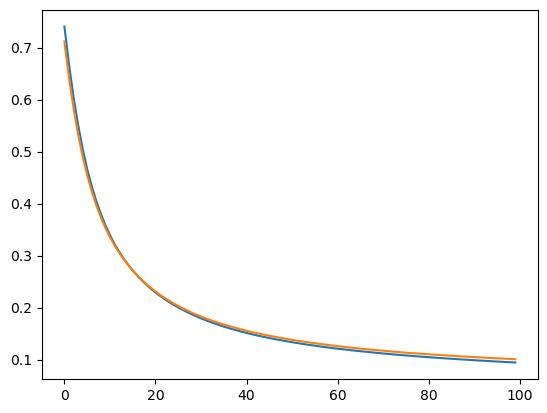

In [38]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')

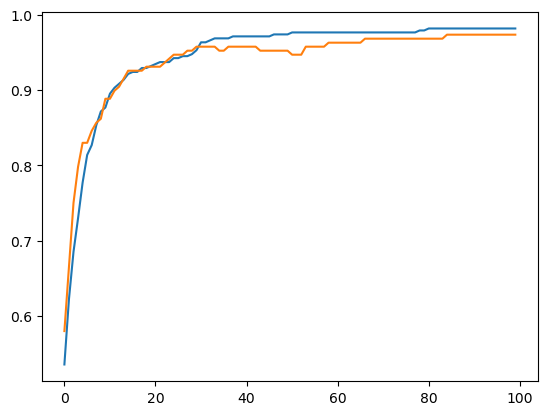

In [39]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')